In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

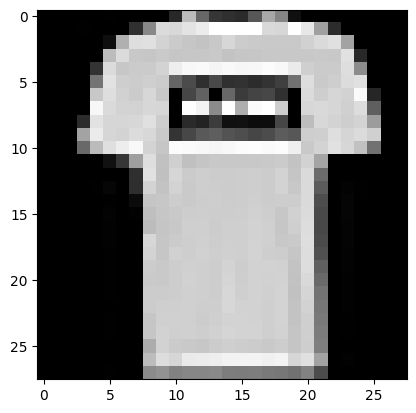

In [3]:
# pick a sample to plot
sample = 1
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# (28,28) to (48,48)
image=np.pad(image,(18,18),'constant',constant_values=0)
image=cv2.resize(image,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
# get_AC 获取自相关
def get_AC(image):
    f = np.fft.fft2(image)
    AC = np.fft.ifft2(np.abs(f) ** 2 )
    AC = abs(np.fft.fftshift(AC))
    return AC

# 归一化矩阵
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

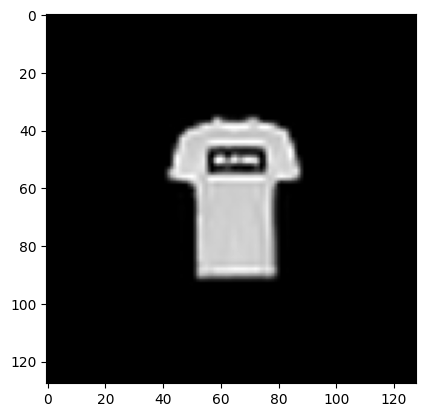

In [5]:
plt.imshow(image,cmap='gray')
plt.show()

In [6]:
# 创建padding后的训练集和测试集矩阵的零矩阵
X_train_padding=np.zeros((60000,128,128)).astype(np.float32)
Y_train_padding=np.zeros((60000,128,128)).astype(np.float32)
X_test_padding=np.zeros((10000,128,128)).astype(np.float32)
Y_test_padding=np.zeros((10000,128,128)).astype(np.float32)


for i in np.arange(X_train.shape[0]):
    # 在训练集中，padding+normalization
    X_train_padding[i]=normalization(cv2.resize(np.pad(X_train[i],(18,18),'constant',constant_values=0),dsize=(128,128),interpolation=cv2.INTER_CUBIC))
    if (i+1)%5000==0:
        print('train_processing: '+str(i+1)+'\n')
    # 获取归一化AC
    Y_train_padding[i]=normalization(get_AC(X_train_padding[i]))
    
for i in np.arange(X_test.shape[0]):
    # 在训练集中，padding+normalization
    X_test_padding[i]=normalization(cv2.resize(np.pad(X_test[i],(18,18),'constant',constant_values=0),dsize=(128,128),interpolation=cv2.INTER_CUBIC))
    # 获取归一化AC
    Y_test_padding[i]=normalization(get_AC(X_test_padding[i]))
    if (i+1)%5000==0:
        print('test_processing: '+str(i+1)+'\n')

train_processing: 5000

train_processing: 10000

train_processing: 15000

train_processing: 20000

train_processing: 25000

train_processing: 30000

train_processing: 35000

train_processing: 40000

train_processing: 45000

train_processing: 50000

train_processing: 55000

train_processing: 60000

test_processing: 5000

test_processing: 10000



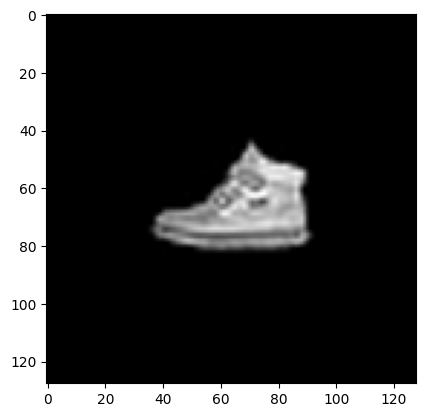

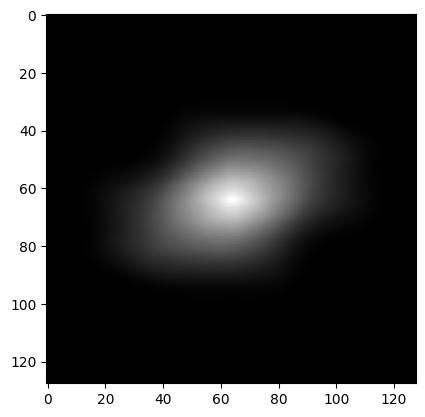

In [7]:
# 测试处理后的数据 保存为float32类型
sample=2006
image_padding = X_train_padding[sample]
AC=Y_train_padding[sample]
# plot the sample
fig = plt.figure
plt.imshow(image_padding, cmap='gray')
plt.show()
plt.imshow(AC, cmap='gray')
plt.show()

In [8]:
# 保存处理后的数据集
np.save('../dataset/fashion_mnist_object_train_60000x128x128.npy',X_train_padding)
np.save('../dataset/fashion_mnist_AC_train_60000x128x128.npy',Y_train_padding)
np.save('../dataset/fashion_mnist_object_test_10000x128x128.npy',X_test_padding)
np.save('../dataset/fashion_mnist_AC_test_10000x128x128.npy',Y_test_padding)